<a href="https://colab.research.google.com/github/andrea-mar/google-trends/blob/main/Copy_of_googletrendsABA_MSciProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends

In [ ]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to /tmp/pip-req-build-27usoyzs
  Running command git clone --filter=blob:none --quiet https://github.com/GeneralMills/pytrends /tmp/pip-req-build-27usoyzs
  Resolved https://github.com/GeneralMills/pytrends to commit a9984ffdc9b31d853dde2ab614a77ecbf2bf33a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pytrends: filename=pytrends-4.9.2-py3-none-any.whl size=15499 sha256=7a3a363aadeab6f1499982e4e2a25620e6bd16a6e9dd2296c838e6c62bef44cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-3kkhnsbf/wheels/2d/b7/b3/ed99bc4c1eead02688423e0034f7e4fa0c317a250ea27304b3
Successfully built pytrends


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import time
import datetime
from datetime import datetime, date, time

### Use pytrends to scrape google trends data - topic interests over the past 5 years

Pytrends documentation: https://pypi.org/project/pytrends/#interest-over-time

According to the Google Trends website <b>Interest over time (IOT)</b> = numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity of the term. A vlaue of 50 means that the term is half as popular. A score of 0 means there was not engouh data for this term. This 0 to 100 scale will be refered further as the trends index.

Each point represents the interest over time for a given week.

The region selected for the analysis is 'worldwide'.

Topic queried: 'Applied behaviour analysis'.
Date of query : 28/07/2023


In [ ]:
# pytrend = TrendReq()
# time zone codes can be found: https://forbrains.co.uk/international_tools/earth_timezones
# setting the timezone to BST does not change the results
pytrend = TrendReq(hl='en-US', tz=60, retries=2, requests_args={'verify':False})

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
# # this will return different results from the the website because:
# # https://stackoverflow.com/questions/59901790/why-is-data-downloaded-via-pytrends-drastically-different-from-using-the-google
# pytrend.build_payload(kw_list=['Applied behavior analysis'], timeframe='today 5-y', geo='')

# google trends uses FREEBASE ID for topic related searches. Applied Behavior Analysis FREEBAE ID = /m/05wf1w (https://www.wikidata.org/wiki/Q621607)
# geo='' means the region is set to 'worldwide' (see pytrends documentation cited above)
pytrend.build_payload(kw_list=['/m/05wf1w'], timeframe='today 5-y' , geo ='')

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
pytrends_iot_df = pytrend.interest_over_time()
pytrends_iot_df.info()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-07-29 to 2023-07-23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   /m/05wf1w  261 non-null    int64
 1   isPartial  261 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 4.3 KB


In [ ]:
pytrends_iot_df = pytrends_iot_df.rename(columns={"/m/05wf1w": "Applied behavior analysis"})

In [ ]:
pytrends_iot_df.head()

,Applied behavior analysis,isPartial
date,,
2018-07-29,53,False
2018-08-05,55,False
2018-08-12,51,False
2018-08-19,52,False
2018-08-26,58,False


Text(0, 0.5, 'Trends Index')

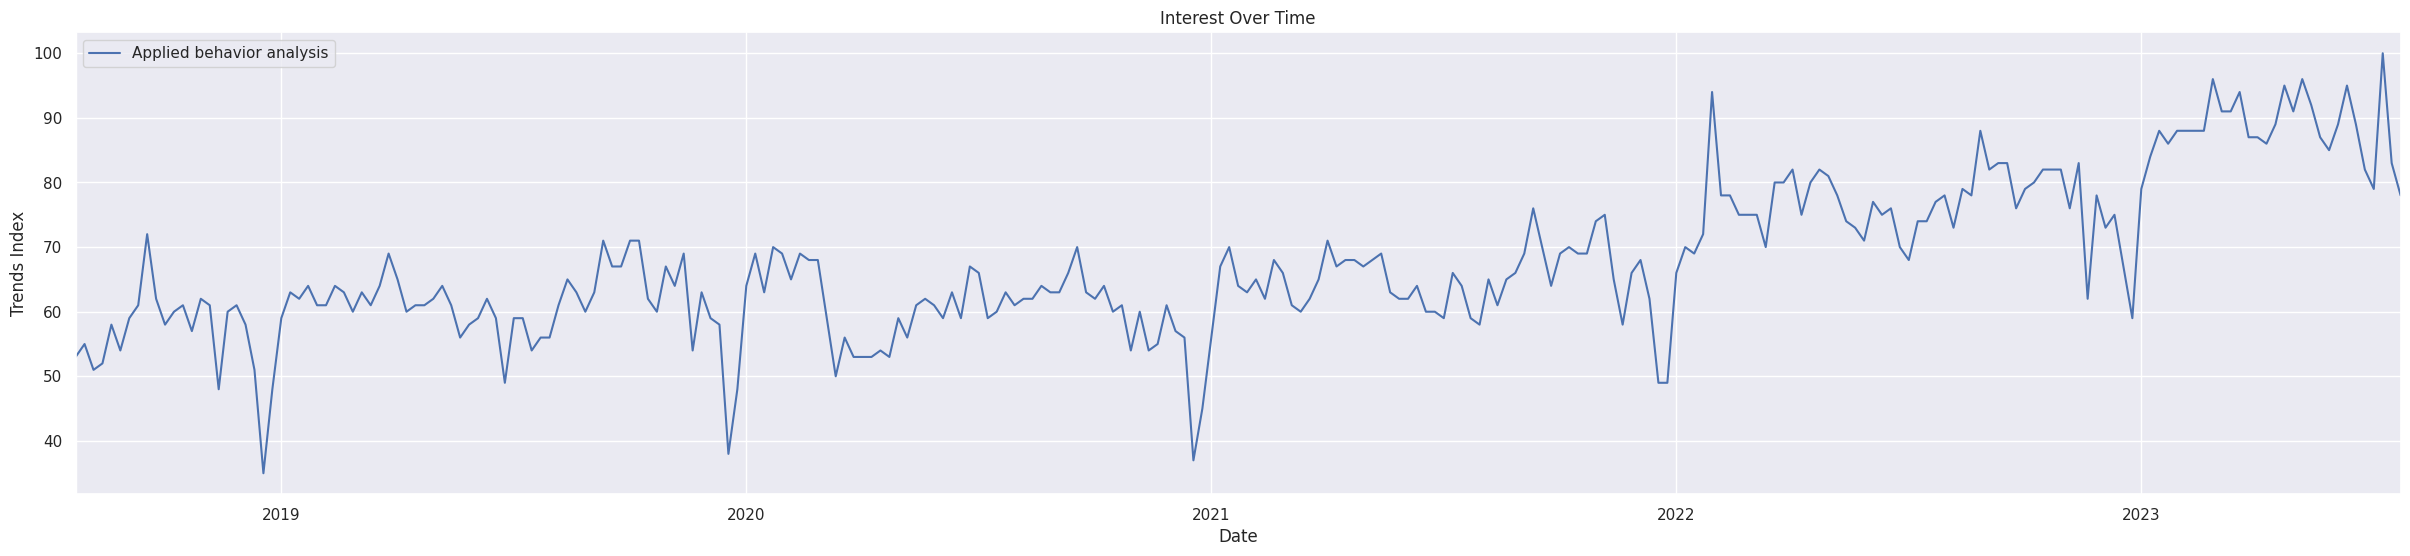

In [ ]:
# visualise IOT
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes='true')
dx = pytrends_iot_df.plot.line(figsize= (30,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')

### Use Google Trends website data - topic interest over the past 5 years
The following represents the same analysis as above except the data has been manually downloaded from Google's website (https://trends.google.com/trends/explore?date=today%205-y&q=%2Fm%2F05wf1w&hl=en)

Date of query : 28/07/2023





In [ ]:
# read the data
site_df = pd.read_csv('aba_gt_global/GTweb_iot_worldwide.csv')
site_df.head()

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52


In [ ]:
# rename the columns with the correct lables
site_df.columns = site_df.iloc[1]
site_df.head()

1,Week,Applied behavior analysis: (Worldwide)
0,NaN,NaN
1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52


In [ ]:
# remove the first 2 rows on the data set - first row was an empty row and the second row contained the columns lables
site_df = site_df.tail(-2)
site_df.head()

1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52
5,2018-08-19,54
6,2018-08-26,60


In [ ]:
# trends index for Applied behavior analysis is stored as a string/object value
# week date is stored as a string/object value
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 2 to 262
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Week                                    261 non-null    object
 1   Applied behavior analysis: (Worldwide)  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [ ]:
# change type of Trends index for Applied behavior analysis from object to int
site_df = site_df.astype({'Applied behavior analysis: (Worldwide)':'int'})
# change the type of week date data from object to datetime
site_df['Week'] = pd.to_datetime(site_df['Week'])

In [ ]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 2 to 262
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Week                                    261 non-null    datetime64[ns]
 1   Applied behavior analysis: (Worldwide)  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


Text(0, 0.5, 'Trends Index')

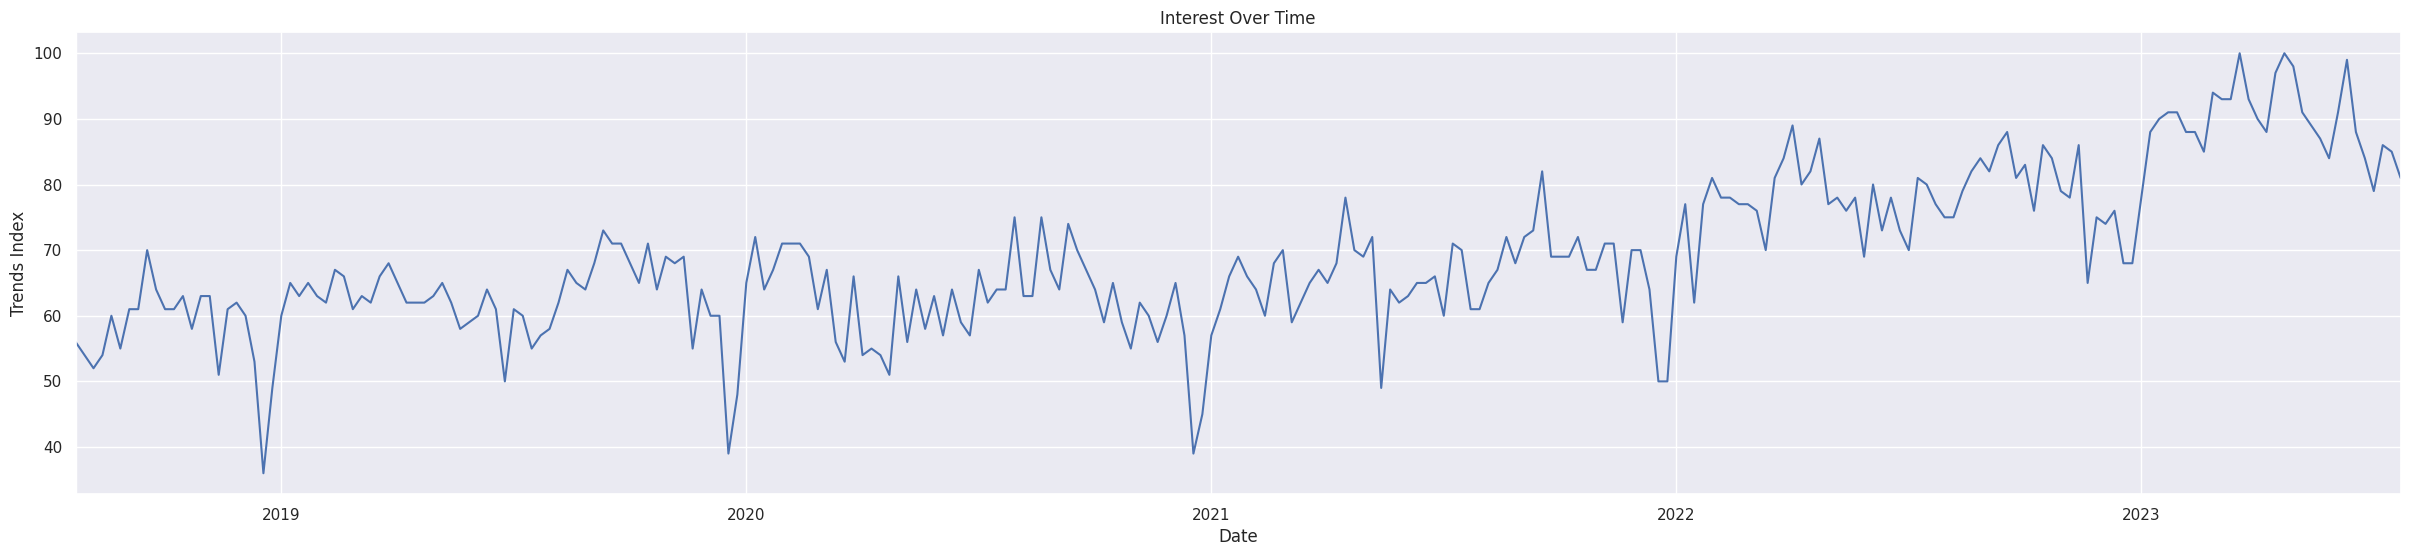

In [ ]:
# visualize IOT
site_df = site_df.set_index(site_df['Week'])
dx = site_df['Applied behavior analysis: (Worldwide)'].plot.line(figsize=(30,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')

The above code shows discrepancies between the data obtained via pytrends vs. via google's official website. I have failed to find the explanation for why this is the case - apparently the data proivded when making calls as legit-user vs scraper is different (https://stackoverflow.com/questions/73988220/why-google-retrieves-different-info-to-scrapers). Google Trends does not have an official API and thus reliability on 3rd party scraping tools can result in questionalble data. I have thus decided to manually download the data from google'e website direclty - the amount of data sets is small and thus this process is faster than to try to figure out a reliable and efficient method of scraping google trends data (this is out of the scope of the current project).

## Google trends data for queries related to the topic: Applied Behaviour Analysis

Date of query : 28/07/2023
Time frame: past 5 years

Data sets obtained:
1. IOT worldwide - analysis provided above
2. Interest by region (Country) worldwide
3. Related topics - worldwide
4. Related queries - worldwide

5. IOT - UK
6. Interest by region (Country) UK
7. Related topics - UK
8. Related queries - UK

### Interest by region (Country) worldwide


In [ ]:
ibr_world_df = pd.read_csv('aba_gt_global/geoMap_global.csv')
ibr_world_df.head()

,Category: All categories
Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN


### Related topics - worldwide


In [ ]:
# upload data
# data is formated strangely -> see possible sollutions at https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
rt_world_df = pd.read_csv('aba_gt_global/relatedEntities_topics_global.csv', skiprows=2)
rt_world_df.head()

,TOP
Therapy,100
Behavior,89
Analysis,55
Autistic Spectrum Disorders,24
Licensed behavior analyst,10


### Related queries - worldwide

In [ ]:
rq_world_df = pd.read_csv('aba_gt_global/relatedQueries_search_global.csv', skiprows=2)
rq_world_df.head()

,TOP
aba,100
aba therapy,22
behavior analysis,10
autism,6
what is aba,6


### IOT - UK

In [ ]:
iot_uk_df = pd.read_csv('aba_gt_uk/GTweb_iot_UK.csv')
iot_uk_df.head()

,Category: All categories
Week,Applied behavior analysis: (United Kingdom)
2018-07-29,42
2018-08-05,39
2018-08-12,50
2018-08-19,36


### Interest by region (Country) UK

In [ ]:
ibr_uk_df = pd.read_csv('aba_gt_uk/geoMap_UK.csv')
ibr_uk_df.head()

,Category: All categories
Region,Applied behavior analysis: (7/28/18 - 7/28/23)
Wales,100
Northern Ireland,89
England,70
Scotland,52


### Related topics - UK

In [ ]:
rt_uk_df = pd.read_csv('aba_gt_uk/relatedEntities_topics_UK.csv', skiprows=2)
rt_uk_df.head()

,TOP
Therapy,100
Behavior,97
Analysis,71
Autistic Spectrum Disorders,35
coach,18


### Related queries - UK

In [ ]:
rq_uk_df = pd.read_csv('aba_gt_uk/relatedQueries_search_UK.csv', skiprows=2)
rq_uk_df.head()

,TOP
aba,100
aba therapy,24
autism,11
autism aba,11
behaviour,10
